In [1]:
from itertools import combinations
from pokemon_effectiveness import pokemon
import matplotlib.pyplot as plt

pkmn=pokemon()

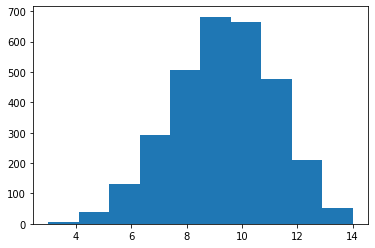

In [2]:
################## Offensive stuff ###################
#myTypes=['flying','dragon','fire','ground','rock','water','ghost','dark','fighting'] #salamence
#myTypes=['electric','dark','fire','ice','fighting','steel'] #Luxraypkmn.typeNames
myTypes=['water','ground','ice','rock','poison']
multiTypeDicts, multiTypeLenghts = pkmn.getMultiOffenseEff(pkmn.typeNames,4)    
plt.hist(multiTypeLenghts)
multiTypeDicts=sorted(multiTypeDicts.items(),key=lambda k_v: k_v[1]['length'],reverse=True)

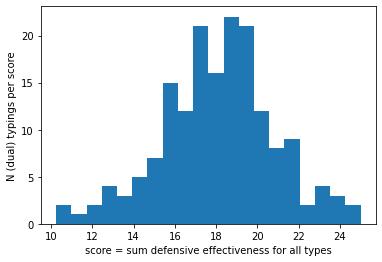

In [3]:
################### Defensive stuff ##################
typeNames = pkmn.typeNames

defenseEffScore={}
for dualType in list(combinations(typeNames, 2)):
    defenseEffDual = pkmn.combineEff(dualType)
    dualTypeString=' '.join(list(dualType))
    defenseEffScore[dualTypeString]=0
    for multiplier in defenseEffDual:
        defenseEffScore[dualTypeString]+=float(multiplier)*len(defenseEffDual[multiplier])

for singleType in typeNames:
    defenseEff = pkmn.getDefenseEff(singleType)
    defenseEffScore[singleType]=0
    for multiplier in defenseEff:
        defenseEffScore[singleType]+=float(multiplier)*len(defenseEff[multiplier])

defenseEffScoreList = []
for key in defenseEffScore:
    defenseEffScoreList.append(defenseEffScore[key])

fig, ax = plt.subplots()
ax.set_xlabel('score = sum defensive effectiveness for all types')
ax.set_ylabel('N (dual) typings per score')
ax.hist(defenseEffScoreList,bins=20)
plt.show()

In [5]:
effDictByType = pkmn.getEffDictByType()

defenseEffScore={}
for dualType in list(combinations(typeNames, 2)):
    defenseEffDual = pkmn.combineEffByType(dualType, effDictByType=effDictByType)
    dualTypeString=' '.join(list(dualType))
    defenseEffScore[dualTypeString]=pkmn.getEffScore(defenseEffDual)

for singleType in typeNames:
    defenseEff = pkmn.getDefenseEffByType(singleType)
    defenseEffScore[singleType]=0
    defenseEffScore[singleType]=pkmn.getEffScore(defenseEff)

defenseEffScore=sorted(defenseEffScore.items(),key=lambda k_v: k_v[1])
print(defenseEffScore)

[('steel fairy', 13.25), ('flying steel', 13.5), ('ghost steel', 14.25), ('steel dragon', 14.25), ('steel water', 14.5), ('normal ghost', 15.0), ('steel', 15.0), ('fighting steel', 15.5), ('ghost dark', 15.5), ('poison steel', 15.75), ('ground steel', 15.75), ('bug steel', 15.75), ('normal steel', 16.0), ('poison dark', 16.0), ('steel electric', 16.0), ('ghost fairy', 16.25), ('steel fire', 16.25), ('steel grass', 16.25), ('steel psychic', 16.25), ('flying electric', 16.5), ('ghost electric', 16.5), ('steel dark', 16.5), ('electric fairy', 16.5), ('normal poison', 17.0), ('normal fairy', 17.0), ('poison water', 17.0), ('poison fairy', 17.0), ('ghost water', 17.0), ('water fairy', 17.0), ('ghost', 17.0), ('ghost fire', 17.25), ('fire fairy', 17.25), ('water electric', 17.25), ('normal electric', 17.5), ('poison ghost', 17.5), ('dragon fairy', 17.5), ('poison', 17.5), ('electric', 17.5), ('fairy', 17.5), ('flying poison', 17.75), ('fire water', 17.75), ('dark fairy', 17.75), ('normal fly